In [1]:
#written 1.17.24 by @caramnix (last udpated 1.25)

#goal: have a single csv for each congress with the following columns 
#Tweet- date- icpsr- member name - party - female - black - cleaned text- sentiment score 

# currently tweet data is stored in separate csv's so we want to merge them together -- nope used cat *.csv >combined.csv
# to combine so data is stored in combined_115,6,7.csv 

#so now want to read this in! do think it may have made more sense to do in chunks but idk we'll see 


In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caranix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
tweets_117= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/cleaned_117_ordered/combined_117.csv")

In [4]:
tweets_117.head()

,index,id,text,author_id,created_at,edit_history_tweet_ids,possibly_sensitive,conversation_id,lang,entities.urls,...,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,attachments.media_keys,entities.hashtags,referenced_tweets,entities.mentions,in_reply_to_user_id,username
0,0,1610370982123798531,"McCarthy earned the right to be the speaker, a...",234797704,2023-01-03T20:22:16.000Z,['1610370982123798531'],FALSE,1610370982123798531,en,"[{'start': 210, 'end': 233, 'url': 'https://t....",...,153,19,20,35975,NaN,NaN,NaN,NaN,NaN,AustinScottGA08
1,1,1607036072474591239,Merry Christmas from our family to yours! Isai...,234797704,2022-12-25T15:30:31.000Z,['1607036072474591239'],FALSE,1607036072474591239,en,"[{'start': 242, 'end': 265, 'url': 'https://t....",...,10,28,0,2138,['3_1607036013167218692'],NaN,NaN,NaN,NaN,AustinScottGA08
2,2,1606435803701428232,RT @jsolomonReports: Watch #JustTheNewsNoNoise...,234797704,2022-12-23T23:45:16.000Z,['1606435803701428232'],FALSE,1606435803701428232,en,NaN,...,0,0,0,0,NaN,"[{'start': 27, 'end': 46, 'tag': 'JustTheNewsN...","[{'type': 'retweeted', 'id': '1606424411405488...","[{'start': 3, 'end': 19, 'username': 'jsolomon...",NaN,AustinScottGA08
3,3,1606366630002425869,I voted no on the omnibus spending bill: https...,234797704,2022-12-23T19:10:24.000Z,['1606366630002425869'],FALSE,1606366630002425869,en,"[{'start': 41, 'end': 64, 'url': 'https://t.co...",...,12,18,0,1672,['3_1606366438859628544'],NaN,NaN,NaN,NaN,AustinScottGA08
4,4,1603415058444390400,"Biden wonders why our border is overwhelmed, b...",234797704,2022-12-15T15:41:54.000Z,['1603415058444390400'],FALSE,1603415058444390400,en,"[{'start': 245, 'end': 268, 'url': 'https://t....",...,16,9,0,0,['13_1603088856785395713'],NaN,NaN,"[{'start': 214, 'end': 228, 'username': 'Morni...",NaN,AustinScottGA08


In [5]:
tweets_117.iloc[493:496] # note, header column incuded-- need to remove 

,index,id,text,author_id,created_at,edit_history_tweet_ids,possibly_sensitive,conversation_id,lang,entities.urls,...,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,attachments.media_keys,entities.hashtags,referenced_tweets,entities.mentions,in_reply_to_user_id,username
493,493,1347218688227872770,The violence &amp; destruction we saw yesterda...,234797704,2021-01-07T16:29:00.000Z,['1347218688227872770'],FALSE,1347218688227872770,en,NaN,...,28,13,4,0,NaN,NaN,NaN,NaN,NaN,AustinScottGA08
494,index,id,text,author_id,created_at,edit_history_tweet_ids,possibly_sensitive,conversation_id,lang,entities.urls,...,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,attachments.media_keys,entities.hashtags,referenced_tweets,entities.mentions,in_reply_to_user_id,username
495,0,1478799536113999877,"RT @msdh: Today MSDH is reporting 6,592 more c...",82453460,2022-01-05T18:44:18.000Z,['1478799536113999877'],FALSE,1478799536113999877,en,NaN,...,0,0,0,0,NaN,NaN,"[{'type': 'retweeted', 'id': '1478787760228024...","[{'start': 3, 'end': 8, 'username': 'msdh', 'i...",NaN,BennieGThompson


In [6]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def label_header(text):
    if "index" in text: 
        return 1 
    else: 
        return 0 


In [7]:
tweets_117['header'] = tweets_117['index'].apply(lambda x: label_header(x))

In [8]:
# remove headers
tweets_117= tweets_117[tweets_117['header']  == 0]

In [9]:
len(tweets_117)

741961

In [10]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def clean_string(text):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove emojis 
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    text= emoji_pattern.sub(r'', text)
    
    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    text = text.split()
    useless_words = [] 
    text_filtered = [word for word in text if not word in useless_words]
    
    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    
    final_string = ' '.join(text_filtered)
    
    return final_string


In [11]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def stem_string(text, stem="None"):

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string


In [12]:
stem_string("mccarthy earned the right to be the speaker an")

'mccarthy earned right speaker'

In [13]:
tweets_117['text']= tweets_117['text'].astype(str)

In [14]:
tweets_117['text_clean'] = tweets_117['text'].apply(lambda x: clean_string(x))
tweets_117['text_clean_stem'] = tweets_117['text_clean'].apply(lambda x: stem_string(x, stem='Stem'))

In [15]:
tweets_117['referenced_tweets']= tweets_117['referenced_tweets'].astype(str)

In [16]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def label_rt(text):
    if "retweeted" in text: 
        return 1 
    else: 
        return 0 



In [17]:
tweets_117['RT'] = tweets_117['referenced_tweets'].apply(lambda x: label_rt(x))

In [18]:
tweets_117_cut = tweets_117[tweets_117["RT"] == 0]

In [19]:
tweets_117_cut

,index,id,text,author_id,created_at,edit_history_tweet_ids,possibly_sensitive,conversation_id,lang,entities.urls,...,attachments.media_keys,entities.hashtags,referenced_tweets,entities.mentions,in_reply_to_user_id,username,header,text_clean,text_clean_stem,RT
0,0,1610370982123798531,"McCarthy earned the right to be the speaker, a...",234797704,2023-01-03T20:22:16.000Z,['1610370982123798531'],FALSE,1610370982123798531,en,"[{'start': 210, 'end': 233, 'url': 'https://t....",...,NaN,NaN,nan,NaN,NaN,AustinScottGA08,0,mccarthy earned the right to be the speaker an...,mccarthi earn right speaker vote damag republi...,0
1,1,1607036072474591239,Merry Christmas from our family to yours! Isai...,234797704,2022-12-25T15:30:31.000Z,['1607036072474591239'],FALSE,1607036072474591239,en,"[{'start': 242, 'end': 265, 'url': 'https://t....",...,['3_1607036013167218692'],NaN,nan,NaN,NaN,AustinScottGA08,0,merry christmas from our family to yours isaia...,merri christma famili isaiah us child born us ...,0
3,3,1606366630002425869,I voted no on the omnibus spending bill: https...,234797704,2022-12-23T19:10:24.000Z,['1606366630002425869'],FALSE,1606366630002425869,en,"[{'start': 41, 'end': 64, 'url': 'https://t.co...",...,['3_1606366438859628544'],NaN,nan,NaN,NaN,AustinScottGA08,0,i voted no on the omnibus spending bill,vote omnibu spend bill,0
4,4,1603415058444390400,"Biden wonders why our border is overwhelmed, b...",234797704,2022-12-15T15:41:54.000Z,['1603415058444390400'],FALSE,1603415058444390400,en,"[{'start': 245, 'end': 268, 'url': 'https://t....",...,['13_1603088856785395713'],NaN,nan,"[{'start': 214, 'end': 228, 'username': 'Morni...",NaN,AustinScottGA08,0,biden wonders why our border is overwhelmed bu...,biden wonder border overwhelm administr allow ...,0
5,5,1602703777609416704,Happy 386th Birthday to @USNationalGuard! Than...,234797704,2022-12-13T16:35:32.000Z,['1602703777609416704'],FALSE,1602703777609416704,en,"[{'start': 92, 'end': 115, 'url': 'https://t.c...",...,['3_1602703634231435281'],NaN,nan,"[{'start': 24, 'end': 40, 'username': 'USNatio...",NaN,AustinScottGA08,0,happy birthday to usnationalguard thank y’all...,happi birthday usnationalguard thank y’all ser...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742354,487,1491089124517810176,Freedom always wins.\n\nMandates never will.,16256269,2022-02-08T16:38:45.000Z,['1491089124517810176'],FALSE,1491089124517810176,en,NaN,...,NaN,NaN,nan,NaN,NaN,virginiafoxx,0,freedom always winsmandates never will,freedom alway winsmand never,0
742355,488,1490723288988925952,Who knows best?\n\nParents ✅\nLiberal elites ❌...,16256269,2022-02-07T16:25:03.000Z,['1490723288988925952'],FALSE,1490723288988925952,en,NaN,...,NaN,NaN,nan,NaN,NaN,virginiafoxx,0,who knows bestparents liberal elites teachers ...,know bestpar liber elit teacher union washingt...,0
742356,489,1490707435782352900,I wonder if President Biden has found those el...,16256269,2022-02-07T15:22:03.000Z,['1490707435782352900'],FALSE,1490707435782352900,en,NaN,...,NaN,NaN,nan,NaN,NaN,virginiafoxx,0,i wonder if president biden has found those el...,wonder presid biden found elus root caus borde...,0
742357,490,1489643955436363780,House Democrats are at the beck and call of th...,16256269,2022-02-04T16:56:09.000Z,['1489643955436363780'],FALSE,1489643955436363780,en,NaN,...,NaN,NaN,nan,NaN,NaN,virginiafoxx,0,house democrats are at the beck and call of th...,hous democrat beck call chines communist parti,0


In [20]:
#analyzer = SentimentIntensityAnalyzer()
#sentence = "The food was great!"
#vs = analyzer.polarity_scores(sentence)
#print("{:-<65} {}".format(sentence, str(vs)))

In [21]:
#vs['compound']

In [22]:
#he compound score is computed by summing the valence scores of each word in the lexicon, 
#adjusted according to the rules, and then normalized to be between -1 (most extreme negative) 
#and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional 
#measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_score(text): 
    vs= analyzer.polarity_scores(text)
    return vs['compound']

In [25]:
tweets_117_cut['vader_score'] = tweets_117_cut['text_clean'].apply(lambda x: vader_score(x))

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_11852/4139108923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_117_cut['vader_score'] = tweets_117_cut['text_clean'].apply(lambda x: vader_score(x))


In [26]:
tweets_117_cut.head()

,index,id,text,author_id,created_at,edit_history_tweet_ids,possibly_sensitive,conversation_id,lang,entities.urls,...,entities.hashtags,referenced_tweets,entities.mentions,in_reply_to_user_id,username,header,text_clean,text_clean_stem,RT,vader_score
0,0,1610370982123798531,"McCarthy earned the right to be the speaker, a...",234797704,2023-01-03T20:22:16.000Z,['1610370982123798531'],FALSE,1610370982123798531,en,"[{'start': 210, 'end': 233, 'url': 'https://t....",...,NaN,nan,NaN,NaN,AustinScottGA08,0,mccarthy earned the right to be the speaker an...,mccarthi earn right speaker vote damag republi...,0,0.1280
1,1,1607036072474591239,Merry Christmas from our family to yours! Isai...,234797704,2022-12-25T15:30:31.000Z,['1607036072474591239'],FALSE,1607036072474591239,en,"[{'start': 242, 'end': 265, 'url': 'https://t....",...,NaN,nan,NaN,NaN,AustinScottGA08,0,merry christmas from our family to yours isaia...,merri christma famili isaiah us child born us ...,0,0.9153
3,3,1606366630002425869,I voted no on the omnibus spending bill: https...,234797704,2022-12-23T19:10:24.000Z,['1606366630002425869'],FALSE,1606366630002425869,en,"[{'start': 41, 'end': 64, 'url': 'https://t.co...",...,NaN,nan,NaN,NaN,AustinScottGA08,0,i voted no on the omnibus spending bill,vote omnibu spend bill,0,-0.2960
4,4,1603415058444390400,"Biden wonders why our border is overwhelmed, b...",234797704,2022-12-15T15:41:54.000Z,['1603415058444390400'],FALSE,1603415058444390400,en,"[{'start': 245, 'end': 268, 'url': 'https://t....",...,NaN,nan,"[{'start': 214, 'end': 228, 'username': 'Morni...",NaN,AustinScottGA08,0,biden wonders why our border is overwhelmed bu...,biden wonder border overwhelm administr allow ...,0,-0.9144
5,5,1602703777609416704,Happy 386th Birthday to @USNationalGuard! Than...,234797704,2022-12-13T16:35:32.000Z,['1602703777609416704'],FALSE,1602703777609416704,en,"[{'start': 92, 'end': 115, 'url': 'https://t.c...",...,NaN,nan,"[{'start': 24, 'end': 40, 'username': 'USNatio...",NaN,AustinScottGA08,0,happy birthday to usnationalguard thank y’all...,happi birthday usnationalguard thank y’all ser...,0,0.8834


In [44]:
len(tweets_117_cut)

580442

In [3]:
# read in demographics from 117th (party, gender, race)

path= "/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/"

leg_117= pd.read_csv(path + "117_leg_les.csv")
leg_117_s= leg_117[["handle", "icpsr", "Democrat", "Female", "state_abbrev.y", "party_code.y", "African.American", "Latinx"]]


In [4]:
leg_117_s= leg_117_s.rename(columns={"state_abbrev.y": "state_abbrev", "party_code.y": "party_code"})

In [5]:
## to lower handles and usernames 

leg_117_s['handle']= leg_117_s['handle'].str.lower()
tweets_117_cut["username"] = tweets_117_cut["username"].str.lower()

In [6]:
tweets_117_merged= tweets_117_cut.merge(leg_117_s, how='left', left_on='username', right_on="handle")

In [31]:
#tweets_117_merged.to_csv("tweets_117_merged.csv")

In [3]:
##
tweets_117_merged= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_117_merged.csv")


/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_1329/2639730023.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_117_merged= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_117_merged.csv")


In [4]:
np.mean(tweets_117_merged['vader_score'])

0.24233056713303686

In [6]:
# rep mean for 117 
np.mean(tweets_117_merged[tweets_117_merged['Democrat'] == 0.0]['vader_score'])

0.15297873417388097

In [7]:
# democrats more positive tweets than reps 
np.mean(tweets_117_merged[tweets_117_merged['Democrat'] == 1.0]['vader_score'])

0.2999753436180366

In [ ]:
# can we plot sentiment by party over time? average by week? 

In [11]:
date_2_parts= tweets_117_merged.created_at.str.split("T", n=1, expand=True)

In [12]:
tweets_117_merged['date'] = date_2_parts[0]

In [13]:
tweets_117_merged['date'] =  pd.to_datetime(tweets_117_merged['date'], format='%Y-%m-%d')

<Axes: xlabel='date'>

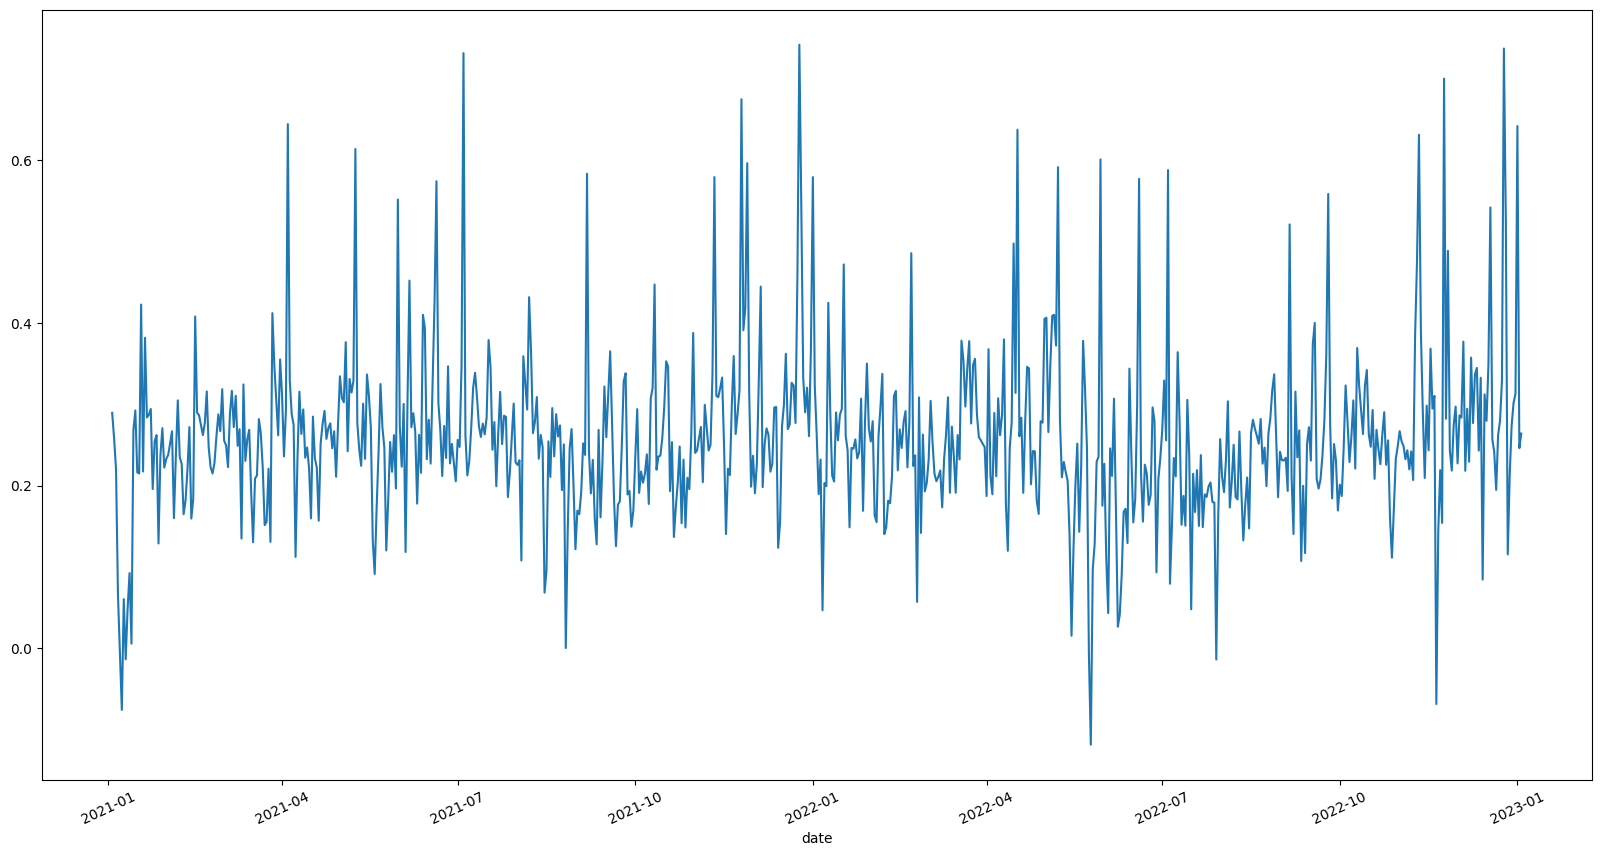

In [14]:
import matplotlib.pyplot as plt

tweets_117_merged.groupby(tweets_117_merged['date'].dt.date)["vader_score"].mean().plot(kind="line",rot=25)

In [8]:
import seaborn as sns 

In [9]:
palette = {
    0.0: '#fc1414',
    1.0: '#1f1fff',
}

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_1329/4253324694.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tweets_117_merged, x="date", y="vader_score", hue= "Democrat", palette= palette, ci = None)


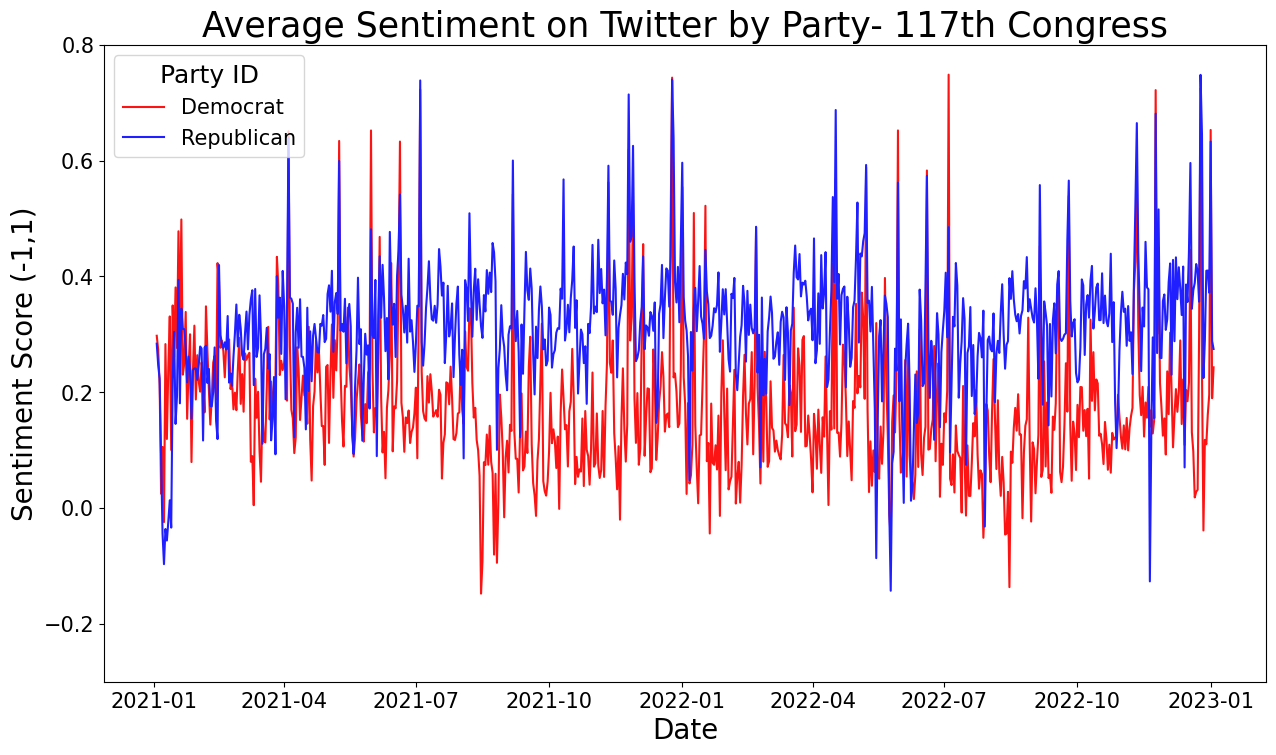

In [22]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

#plt.axhline(y=0, color="grey") 
sns.lineplot(data=tweets_117_merged, x="date", y="vader_score", hue= "Democrat", palette= palette, ci = None)
plt.legend(title='Party ID', loc='upper left', labels=['Democrat', 'Republican'], title_fontsize=18, fontsize="15") #bbox_to_anchor=(1.15, 1)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Sentiment Score (-1,1)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-.3,.8)

plt.title("Average Sentiment on Twitter by Party- 117th Congress", fontsize=25)


plt.savefig('sentiment_117_v3.png', dpi=500, bbox_inches="tight")

In [43]:
tweets_117_merged['party_code'].unique()

array([200, 100])

In [368]:
# old code for when there were na's we fixed them now though :) 
tweets_117_merged["party"] = np.where(tweets_117_merged['party_code']== 200.0, "R",
                                      np.where(tweets_117_merged['party_code']== 100.0, "D", "nan"))
                                      
                                      

In [369]:
tweets_117_merged[tweets_117_merged.party == "nan"] # -- presumably tweets from michaelgwaltz 

,index,id,text,author_id,created_at,edit_history_tweet_ids,possibly_sensitive,conversation_id,lang,entities.urls,...,vader_score,handle,icpsr,Democrat,Female,state_abbrev,party_code,African.American,Latinx,party
561523,0,1433074306712485891,Watch live: https://t.co/D05TdQr0Iu https://t....,833673914,2021-09-01T14:28:34.000Z,['1433074306712485891'],FALSE,1433073285496025089,en,"[{'start': 12, 'end': 35, 'url': 'https://t.co...",...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
561524,1,1433073285496025089,Heading into the #FY22NDAA markup and looking ...,833673914,2021-09-01T14:24:31.000Z,['1433073285496025089'],FALSE,1433073285496025089,en,"[{'start': 176, 'end': 199, 'url': 'https://t....",...,0.7430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
561525,2,1433065134583386118,Every veteran who has fought the Taliban is si...,833673914,2021-09-01T13:52:07.000Z,['1433065134583386118'],FALSE,1433065134583386118,en,"[{'start': 281, 'end': 304, 'url': 'https://t....",...,-0.3400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
561526,3,1433065104556298245,And I’ll be standing with you in the House @Li...,833673914,2021-09-01T13:52:00.000Z,['1433065104556298245'],FALSE,1433065104556298245,en,"[{'start': 126, 'end': 149, 'url': 'https://t....",...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
561527,4,1433049460523905024,Or else what? https://t.co/OaGqZoFDM8,833673914,2021-09-01T12:49:50.000Z,['1433049460523905024'],FALSE,1433049460523905024,en,"[{'start': 14, 'end': 37, 'url': 'https://t.co...",...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564461,452,1345774925617848322,@RepMaxineWaters .@RepDonBeyer objected to the...,833673914,2021-01-03T16:52:00.000Z,['1345774925617848322'],FALSE,1345518444263911430,en,"[{'start': 251, 'end': 274, 'url': 'https://t....",...,-0.7430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
564462,453,1345741455017574402,When @RepMaxineWaters stood in front of Congre...,833673914,2021-01-03T14:39:00.000Z,['1345741455017574402'],FALSE,1345518444263911430,en,"[{'start': 187, 'end': 210, 'url': 'https://t....",...,-0.4588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
564463,454,1345547174898233344,When Pelosi called on Congress to protect the ...,833673914,2021-01-03T01:47:00.000Z,['1345547174898233344'],FALSE,1345518444263911430,en,"[{'start': 284, 'end': 307, 'url': 'https://t....",...,0.7351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
564464,455,1345538093290565632,No matter how much we disagree with each other...,833673914,2021-01-03T01:10:54.000Z,['1345538093290565632'],FALSE,1345538093290565632,en,"[{'start': 166, 'end': 189, 'url': 'https://t....",...,-0.9049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [324]:
## wait, what values are Na's 

handles_we_have_tweets_for = tweets_117_cut["username"].unique()
legs_we_have_info_for= leg_117_s["handle"].unique()


In [325]:
def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)
     
# Driver Code
lst1 = [ 4, 9, 1, 17, 11, 26, 28, 28, 26, 66, 91]
lst2 = [9, 9, 74, 21, 45, 11, 63]
print(Intersection(lst1, lst2))

{9, 11}


In [331]:
overlap= list(Intersection(handles_we_have_tweets_for, legs_we_have_info_for))#396 overlap

In [332]:
#in first but not in 2nd
s = set(overlap)
temp3 = [x for x in handles_we_have_tweets_for if x not in s]
print(temp3)

#added these by hand for 117: ['repamata', 'repbourdeaux', 'repcicilline', 'repdanbishop', 'repjacobs', 'repjamescomer', 'repjenniffer', 'repmikegarcia', 'reptiffany', 'repyoungkim'] 

['repamata', 'repbourdeaux', 'repcicilline', 'repdanbishop', 'repjacobs', 'repjamescomer', 'repjenniffer', 'repmikegarcia', 'reptiffany', 'repyoungkim', 'michaelgwaltz']


In [333]:
#in second but not in 1st
s = set(handles_we_have_tweets_for)
temp3 = [x for x in overlap if x not in s]
print(temp3)


[]


In [121]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

text = emoji_pattern.sub(r'', tweets_117_cut.loc[742355].text_clean)


In [122]:
text

'know bestpar liber elit teacher union washington bureaucrats'